# Tratamento do banco de dados

In [ ]:
#Carregar banco de dados
import pandas as pd

baseline = pd.read_excel('baseline.xlsx')
dano1 = pd.read_excel('1_dano.xlsx')
dano2 = pd.read_excel('2_dano.xlsx')
dano3 = pd.read_excel('3_dano.xlsx')

In [ ]:
#Remover linha da frequência
dataset_baseline = baseline.drop([0], axis=1)
dataset_dano1 = dano1.drop([0], axis=1)
dataset_dano2 = dano2.drop([0], axis=1)
dataset_dano3 = dano3.drop([0], axis=1)

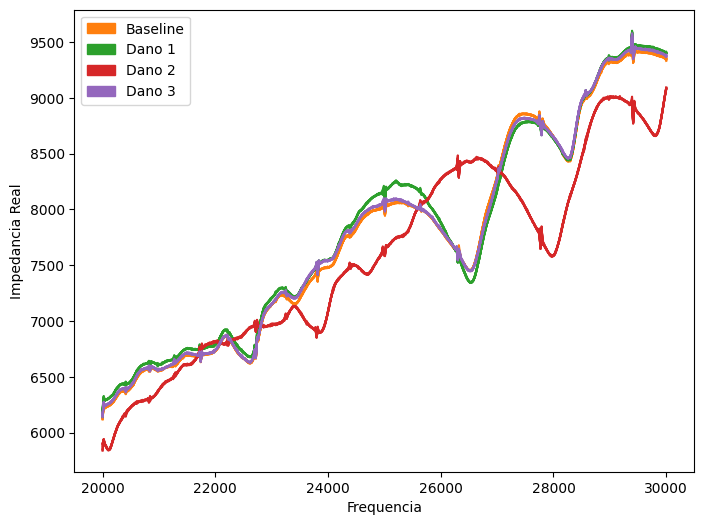

In [ ]:
#Visualizar comportamento do banco de dados
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.figure(figsize=(8,6))

plt.plot(baseline[0], dataset_baseline, color='C1')
plt.plot(dano1[0], dataset_dano1, color='C2')
plt.plot(dano2[0], dataset_dano2, color='C3')
plt.plot(dano3[0], dataset_dano3, color='C4')

plt.xlabel("Frequencia")
plt.ylabel("Impedancia Real")

caso1 = mpatches.Patch(color='C1', label='Baseline')
caso2 = mpatches.Patch(color='C2', label='Dano 1')
caso3 = mpatches.Patch(color='C3', label='Dano 2')
caso4 = mpatches.Patch(color='C4', label='Dano 3')

plt.legend(handles=[caso1, caso2, caso3, caso4])

# Definindo dados de baseline e dano

In [ ]:
df_bs = dataset_baseline.T
df_d1 = dataset_dano1.T
df_d2 = dataset_dano2.T
df_d3 = dataset_dano3.T

# Semi não supervisionado: LOF

In [ ]:
#Dados de treino - Deve conter somente baseline
X_train_lof = df_bs.iloc[0: 5]

X_train_lof

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
1,6146,6247,6220,6223,6231,6239,6242,6255,6257,6263,...,9386,9383,9373,9370,9369,9368,9365,9361,9356,9346
2,6124,6240,6218,6227,6233,6240,6243,6249,6258,6265,...,9387,9374,9382,9378,9372,9365,9362,9361,9353,9354
3,6160,6247,6216,6229,6230,6236,6244,6244,6257,6273,...,9378,9378,9375,9374,9366,9365,9365,9358,9353,9341
4,6131,6249,6218,6224,6231,6232,6240,6247,6254,6266,...,9384,9383,9376,9371,9368,9369,9366,9354,9355,9331
5,6130,6246,6217,6226,6234,6236,6239,6245,6259,6267,...,9384,9375,9379,9373,9370,9366,9363,9359,9352,9348


In [ ]:
#Dados de teste
X_test_lof = pd.concat([df_bs.iloc[5: 10], df_d1, df_d2, df_d3], axis=0)

X_test_lof

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
6,6128,6243,6221,6231,6230,6238,6243,6248,6259,6270,...,9387,9376,9378,9374,9370,9368,9366,9360,9354,9337
7,6117,6250,6219,6227,6234,6240,6242,6246,6256,6269,...,9391,9379,9377,9379,9373,9366,9368,9359,9359,9350
8,6121,6245,6225,6229,6233,6238,6242,6248,6257,6271,...,9384,9386,9385,9377,9376,9369,9366,9358,9357,9355
9,6135,6244,6217,6233,6232,6241,6247,6249,6259,6273,...,9390,9385,9388,9379,9373,9369,9363,9366,9357,9357
10,6147,6256,6229,6228,6236,6242,6245,6254,6264,6266,...,9386,9383,9376,9383,9373,9371,9366,9363,9356,9344
1,6197,6308,6294,6293,6295,6304,6309,6316,6324,6336,...,9435,9423,9434,9435,9424,9421,9415,9411,9405,9400
2,6186,6308,6287,6292,6300,6304,6310,6316,6324,6329,...,9440,9427,9432,9429,9424,9422,9420,9412,9411,9402
3,6175,6322,6287,6293,6294,6303,6308,6316,6329,6337,...,9437,9441,9437,9428,9428,9419,9417,9416,9411,9398
4,6162,6295,6287,6293,6298,6304,6309,6321,6326,6338,...,9439,9419,9431,9427,9425,9420,9421,9417,9410,9399
5,6212,6328,6291,6293,6301,6304,6310,6322,6328,6338,...,9440,9431,9437,9434,9424,9422,9422,9414,9408,9397


In [ ]:
#Aplicação do método LOF
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=4, novelty=True).fit(X_train_lof)

y_pred_test = clf.predict(X_test_lof)

print("Predição do modelo: ", y_pred_test)

Predição do modelo:  [ 1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


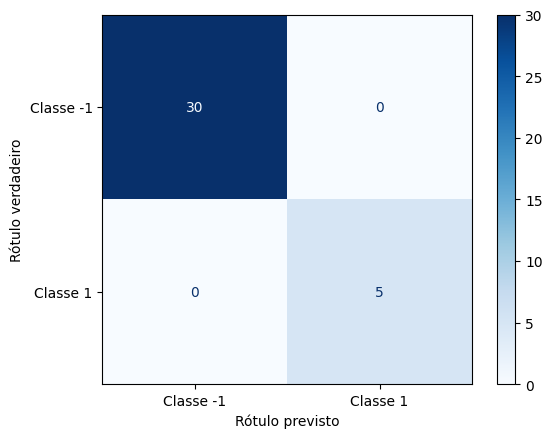

In [ ]:
#Métrica de avaliação - Matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_test = np.array([1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Classe -1', 'Classe 1'])
disp.plot(cmap=plt.cm.Blues)

plt.xlabel('Rótulo previsto')
plt.ylabel('Rótulo verdadeiro')
plt.show()

Taxa de Falsos Positivos: [0. 0. 1.]
Taxa de Verdadeiros Positivos: [0. 1. 1.]
Limiares: [ 2  1 -1]
Área sob a curva (AUC-ROC): 1.0


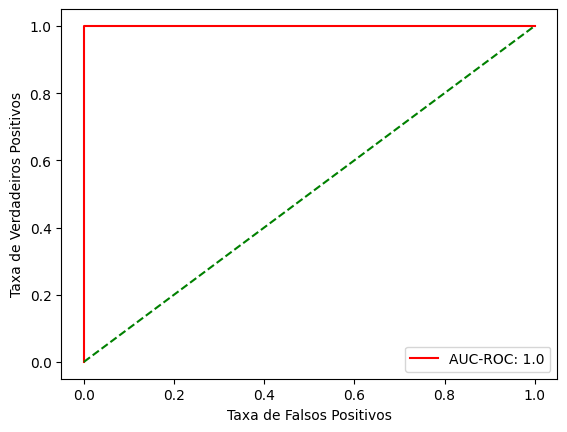

In [ ]:
#Métrica de avaliação - ROC e Accuracy
from sklearn.metrics import roc_curve, roc_auc_score

# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Calculando a área sob a curva ROC (AUC-ROC)
auc = roc_auc_score(y_test, y_pred_test)

print("Taxa de Falsos Positivos:", fpr)
print("Taxa de Verdadeiros Positivos:", tpr)
print("Limiares:", thresholds)
print("Área sob a curva (AUC-ROC):", auc)

# Plotando a curva ROC
plt.plot(fpr, tpr, color='red', label='AUC-ROC: %0.1f' % auc)
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#Métrica de avaliação - Accuracy
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred_test)

print("Precisão do modelo: %0.1f" % acc)

Precisão do modelo: 0.9


# Semi supervisionado: Máquinas de vetores de suporte

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

df = pd.concat([df_bs, df_d1, df_d2, df_d3], axis=0)

y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.35, random_state=42)

In [ ]:
from sklearn.svm import SVC
from sklearn.semi_supervised import SelfTrainingClassifier

# Dados rotulados
X_labeled = X_train[0: 13]  # Seus dados rotulados
y_labeled = y_train[0: 13]  # Seus rótulos correspondentes

# Dados não rotulados
X_unlabeled = X_train[13: 26]  # Seus dados não rotulados
y_unlabeled = np.array([-1] * len(X_unlabeled))

# Cria um classificador SVM
base_classifier = SVC(kernel='linear', probability=True)

# Cria o classificador de treinamento semi-supervisionado
classifier = SelfTrainingClassifier(base_classifier)

X_combined = np.vstack((X_labeled, X_unlabeled))
y_combined = np.hstack((y_labeled, y_unlabeled))

# Treina o classificador usando os dados rotulados e não rotulados
classifier.fit(X_combined, y_combined)

# Realiza a classificação dos novos exemplos
y_pred_SVM = classifier.predict(X_test)

In [ ]:
print("Dados rotulados: ", y_test)
print("Predicao: ", y_pred_SVM)

Dados rotulados:  [1 1 1 1 0 1 1 1 1 0 1 0 1 1]
Predicao:  [1 1 1 1 0 1 1 1 1 0 1 0 1 1]


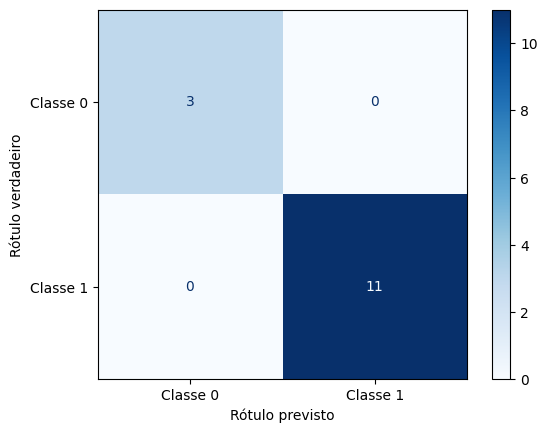

In [ ]:
#Métrica de avaliação - Matriz de confusão
cm_SVM = confusion_matrix(y_test, y_pred_SVM)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_SVM, display_labels=['Classe 0', 'Classe 1'])
disp.plot(cmap=plt.cm.Blues)

plt.xlabel('Rótulo previsto')
plt.ylabel('Rótulo verdadeiro')
plt.show()

Taxa de Falsos Positivos: [0. 0. 1.]
Taxa de Verdadeiros Positivos: [0. 1. 1.]
Limiares: [2 1 0]
Área sob a curva (AUC-ROC): 1.0


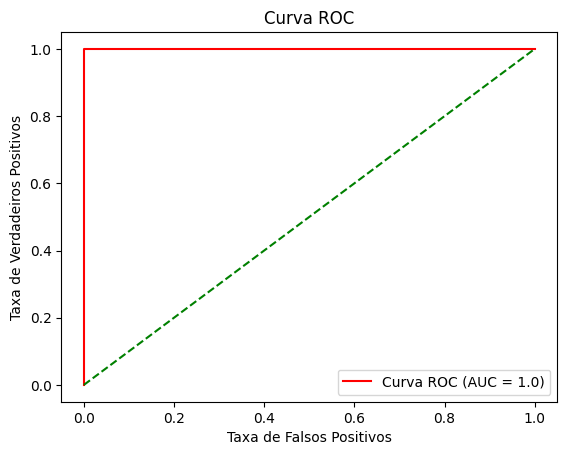

In [ ]:
#Métrica de avaliação - ROC e Accuracy
from sklearn.metrics import roc_curve, roc_auc_score

# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_SVM)

# Calculando a área sob a curva ROC (AUC-ROC)
auc = roc_auc_score(y_test, y_pred_SVM)

print("Taxa de Falsos Positivos:", fpr)
print("Taxa de Verdadeiros Positivos:", tpr)
print("Limiares:", thresholds)
print("Área sob a curva (AUC-ROC):", auc)

# Plotando a curva ROC
plt.plot(fpr, tpr, color='red', label='Curva ROC (AUC = %0.1f)' % auc)
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()